### Importing Libraries

---

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom Seaborn Style

---

In [2]:
sns.set_theme('paper')
sns.set_style('ticks')

### Adding `utils` to `PYTHONPATH`

---

In [3]:
sys.path.append(os.path.abspath("../utils"))

### Reading Parquet File

---

In [4]:
# Importing load_parquet function from read_data module
from read_data import load_parquet
cars = load_parquet('clean_data', 'clean_data_with_no_outlier.parquet')
cars.head()

,km_driven,fuel_type,transmission,owner,price,engine_capacity,year,brand,model
0,88760,Petrol,Manual,1st owner,219000,998,2012,Maruti,Wagon R 1.0
1,17920,Petrol,Manual,1st owner,266000,796,2016,Maruti,Alto 800
2,9940,Petrol,Manual,1st owner,496000,1373,2014,Maruti,Ertiga
3,67340,Petrol,Manual,2nd owner,355000,1199,2016,Tata,Tiago
4,30390,Petrol,Manual,1st owner,530000,998,2023,Maruti,New Wagon-R


In [5]:
# Since we have removed some data while outlier detection and removal,
# Some of the categories in categorical columns might got removed but the category will still be present
# Because we have converted object datatype into category datatype, so we have to remove these unused categories manually
cat_col = cars.select_dtypes(include='category').columns
for column in cat_col:
    cars[column] = cars[column].cat.remove_unused_categories()

### Analyzing `fuel_type` Column

---

In [6]:
# Unique categories in "fuel_type" column
cars['fuel_type'].unique()

['Petrol', 'Diesel', 'CNG', 'Electric']
Categories (4, object): ['CNG', 'Diesel', 'Electric', 'Petrol']

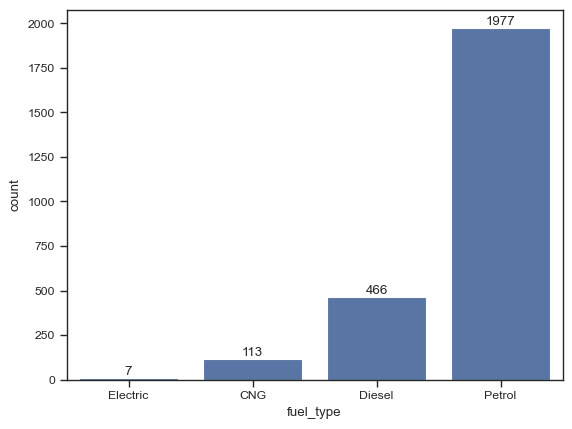

In [7]:
# Count of different categories in "fuel_type" column
ax = sns.countplot(x=cars['fuel_type'], order=cars['fuel_type'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.show()

**Interpretation of above Plot :**
- Petrol is by far the most common fuel type, with 1977 entries.
- It makes up ~76.5% of the total vehicles in the dataset.
- Diesel vehicles account for 466 entries (~18%).
- Only 113 vehicles (~4.4%) use Compressed Natural Gas.
- Just 7 vehicles (<0.3%) are electric.

In [8]:
# Average Price based on "fuel_type" column
cars.groupby(by='fuel_type', observed=True)['price'].mean().apply(lambda x: round(x)).sort_values()

fuel_type
CNG         505805
Petrol      601108
Electric    613000
Diesel      878562
Name: price, dtype: int64

- Electric cars have higher average price than CNG and Petrol despite having only 7 entries.
- This indicates that the few electric vehicles included are likely premium models, skewing the average upward.
- With such a small sample size (<0.3%), Electric cars don't provide statistically meaningful information.
- So its better to exclude Electric cars from the data.

In [9]:
# Removing Electric from "fuel_type" column
cars = cars[~cars['fuel_type'].isin(['Electric'])]

In [10]:
# Removing unused categories from "fuel_type" column
cars['fuel_type'] = cars['fuel_type'].cat.remove_unused_categories()

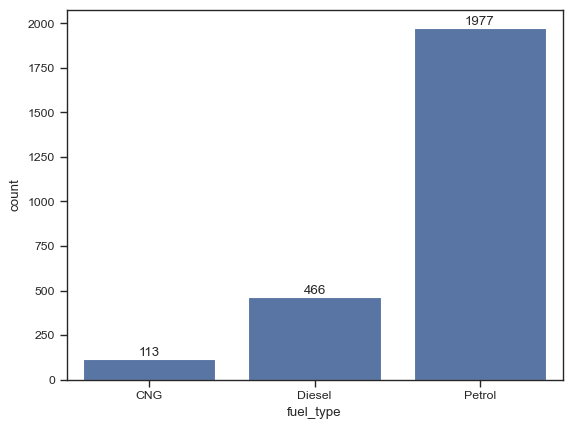

In [11]:
# Count of different categories in "fuel_type" column after transformation
ax = sns.countplot(x=cars['fuel_type'], order=cars['fuel_type'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.show()

### Analyzing `owner` Column

---

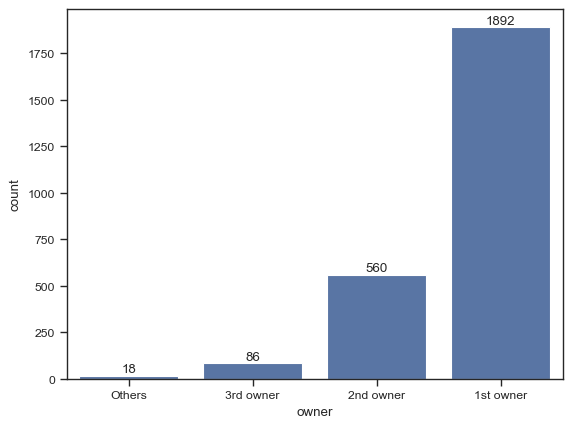

In [12]:
# Count of different categories in "owner" column
ax = sns.countplot(x=cars['owner'], order=cars['owner'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.show()

**Interpretation of above Plot :**
- 1st Owner dominates with 1892 entries (~73.6%).
- 2nd Owner is the second largest group with 560 entries (~21.8%).
- 3rd Owner and Others are minimal, with 86 (3.3%) and 18 (0.7%) entries respectively.
- Majority of vehicles are first-hand, indicating a relatively newer or less-used vehicle dataset.

In [13]:
# Average Price based on "owner" column
cars.groupby(by='owner', observed=True)['price'].mean().apply(lambda x: round(x)).sort_index()

owner
1st owner    677328
2nd owner    577566
3rd owner    503849
Others       371333
Name: price, dtype: int64

- There is a consistent decline in average price from 1st owner to Others.
- The drop in average price reflects vehicle depreciation and perceived lower value as the vehicle passes through more owners.